In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-65k-movie-reviews-and-translation/IMDB-Dataset.csv


In [52]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-65k-movie-reviews-and-translation/IMDB-Dataset.csv',encoding='latin-1')
df.head(5)

,Ratings,Reviews,Movies,Resenhas
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f..."
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these actually just seem to be taken from trailers.There is nothing clever or witty or re...",Disaster Movie,"Estou escrevendo isso na esperanÃ§a de que isso seja colocado sobre a revisÃ£o anterior deste ""filme"". Como alguÃ©m pode achar divertido esse desleixo estÃ¡ completamente alÃ©m de mim. Antes de mais nada, um filme de parÃ³dia intitulado ""Filme de desastre"" deveria ser, de fato, uma parÃ³dia de filmes de desastre. Agora eu jÃ¡ vi 1 (sim, conte-os, 1) filme de desastre sendo falsificado, sendo ""Twister"". Como Juno, Homem de Ferro, Batman, O Hulk, Alvin e os Esquilos, Amy Winehouse ou Hancock se registram como filmes de Desastre? Selzterwater e Failburg mostraram mais uma vez que nÃ£o possuem nenhum tipo de habilidade e humor de escrita. Infelizmente, tendo sido torturado com Date Movie e Epic Movie, sei exatamente o que esperar desses dois ... nenhum enredo, nenhuma piada, apenas mÃ¡s referÃªncias e cenas refeitas de outros filmes. AlguÃ©m deveria ter informado a eles que a sÃ¡tira Ã© mais do qu

In [53]:
df.Ratings.value_counts()

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64

In [54]:
df['Label'] = df['Ratings'].apply(lambda x: 1 if x>=7 else (0 if x<=4 else 2))
df.sample(5)

,Ratings,Reviews,Movies,Resenhas,Label
119176,8.0,"The perfect amount of oldie vibes and ridiculously outrageous crazy bits that make for such a fun experience! Best as a late night movie but I didn't get much sleep last night so I feel tired enough to crave everything wild happening in it. The soundtrack is a delight and the horror is like a nice buddy hangout. Laugh your butt off and goof around; nice fun! Cheesy awesome grittiness and inappropriateness, the absurdity is hilarious and mindless.",Sorority Babes in the Slimeball Bowl-O-Rama,"A quantidade perfeita de vibraÃ§Ãµes antigas e pedaÃ§os loucos ridiculamente ultrajantes que contribuem para uma experiÃªncia tÃ£o divertida! Melhor como um filme noturno, mas nÃ£o dormi muito ontem Ã noite, entÃ£o me sinto cansado o suficiente para desejar tudo o que estÃ¡ acontecendo nele. A trilha sonora Ã© uma delÃ­cia e o horror Ã© como um bom ponto de encontro de amigos. Ria e se divirta; boa diversÃ£o! Serenidade impressionante e extravagante e extravagante, o absurdo Ã© hilÃ¡rio e irracional.",1
30820,3.0,There's something intriguing about the Doomsday Machine which is hard to say exactly what it is of course we can agree upon the fact that the emotions are silly the story is nonsense the only interesting thing is that it's like a form of Dynasty or dollars in space and that of course my friends is the reason why you should really be watching them we watch need to be watching it and looking at the women imagining them without their clothes and all of these things it is just a wonderful thing to look at them then you start to appreciate the story and the colors and everything inshallah Allahu Akbar,Doomsday Machine,"HÃ¡ algo intrigante sobre a MÃ¡quina do Dia do JuÃ­zo Final que Ã© difÃ­cil dizer exatamente o que Ã© claro, podemos concordar com o fato de que as emoÃ§Ãµes sÃ£o bobas, a histÃ³ria nÃ£o faz sentido, a Ãºnica coisa interessante Ã© que Ã© como uma forma de dinastia ou dÃ³lares no espaÃ§o e que Ã© claro que meus amigos Ã© a razÃ£o pela qual vocÃª realmente deveria assisti-los, assistimos, precisamos assistir e olhar para as mulheres imaginando-as sem roupas e todas essas coisas, Ã© simplesmente maravilhoso olhar para elas, entÃ£o vocÃª comeÃ§a para apreciar a histÃ³ria e as cores e tudo inshallah Allahu Akbar",0
28317,2.0,"The opening of the movie is pretty strong. It starts off with that old urban legend about the couple making out in a car, and the boyfriend gets out to investigate a noise, and the girlfriend goes out after him...That's all pretty corny, but then there's a twist, that's pretty good. We're introduced to some new characters and this scene is also pretty suspenseful. After the cops show up, though, there's not much point in continuing to watch.The killer, whose face we've gotten a good look at, keeps showing up around women who are getting married. He seems to wear some kind of white and blue makeup around his eyes. He appears, there's a musical sting on the soundtrack, then he disappears. There's even a sting for both when the audience sees him, and then in the same shot a second when another character sees him. He may then reappear to actually kill someone (sometimes he doesn't), and there's a musical sting with his every plunge of the knife.Tom Hanks does show up eventually about a...",è¡ç´ æ¿ºç½ç´,"A abertura do filme Ã© bastante forte. ComeÃ§a com aquela velha lenda urbana sobre o casal se beijando em um carro, e o namorado sai para investigar um barulho, e a namorada sai atrÃ¡s dele ... Isso Ã© brega, mas depois hÃ¡ uma reviravolta, Ã© lindo Boa. Somos apresentados a alguns novos personagens e essa cena tambÃ©m Ã© bastante suspense. PorÃ©m, depois que os policiais aparecem, nÃ£o hÃ¡ muito sentido em continuar assistindo. O assassino, cujo rosto vimos bem, continua aparecendo em torno de mulheres que se casam. Ele parece usar algum tipo de maquiagem branca e azul ao redor dos olhos. Ele aparece, hÃ¡ uma picada musical na trilha sonora, entÃ£o ele de

In [55]:
df.Label.value_counts()

Label
0    60000
1    60000
2    30000
Name: count, dtype: int64

In [56]:
df.shape

(150000, 5)

In [57]:
df = df[df['Label']<2]
df = df[['Reviews','Label']]

In [58]:
df.shape

(120000, 2)

In [59]:
import pandas as pd
pd.options.display.max_colwidth = 1000
df.sample(5)

,Reviews,Label
22295,"I'm a little puzzled about some of the other reviews and I'm wondering if I saw the same movie. I think it was a mediocre film at best. The acting was bad and contrived with actors expressing very little in the way of emotions and displaying a forced solemnity that made me cringe a couple times. The story is lackluster and bland with serious pacing issues and tropes seen dozen of times before. While I was watching I couldn't shake that feeling the film tried very hard to achieve an epic grandeur like a Lord of the ring but failed at that because its source material is just not very deep. It felt amateurish, frantic, trying to cram too much things in one place. Only watch it if you are a Die-Hard fan of the Warcraft games I guess.",0
33672,"To start, yes it's entertaining, but their comes a point when you sit back and realize how scripted it was, all these shows want to add the drama, just to keep the people watching. In the end just a bunch a millennials trying to get more fame by doing what ever they have to. Conclusion no true outcome for anyone.",0
126380,"When I saw better than expected, I knew it would be good. But it was better than good, it was great.Very witty, sexy movie. Take the humour of Sherlock (with Robert Downey Jr. & Jude law) and stick it in a bond movie- then you have The man from U.N.C.L.E. - I like bond movies, but I LOVED the man from uncle. It doesn't get boring, or drop at any point. If you've read anything negative from critics Don't listen to what critics have to say, they don't like any kind of movie if it's not based on a true story. It's certainly worth the price of admission, you'll be glad you saw it. I'm honestly hoping a second will be made.",1
41138,"Even though this show may focus on a more action based version of Mythbusters (I guess), it's pretty much the same thing. Even though Mythbuster have had (and still have) quite a few fouled myth busts, it still (by far) is a better show.The cast in Smash Lab does not have the same charisma as those in Mythbusters, especially the ""Scientist"". Just like in Mythbusters, by Kari, she seem not that skilled and just is there to present events or technical stuff. Kari in Mythbusters though, still have charisma (but sometimes it looks a little fake). I would rather have seen someone like Scottie (from Mythbusters), who really showed that she had skills.Since the cast is so boring, the tests don't get very exciting or interesting. And, since the tests them self is not that thought trough (much like Mythbusters), it don't give me much reason to watch.After watching a few episodes, I just have to say that this show is quite bad. I will record the forthcoming episodes and check if it get's any...",0
24968,"Mike Hammer helped the poor and down trodden. Ray Donovan helps the rich and powerful. Mike Hammer was all tongue in cheek. Ray Donovan plays it straight and it doesn't work. This show has an impressive cast, great sets, stereotypical characters, cookie-cutter plots and subplots--- and there are a lot of them, all of which are telegraphed to the audience with no subtlety whatsoever. I liked Ann Biderman's Southland a lot and looked forward to this, but am disappointed to say the least. There is never a point where anything that would intrigue or challenge the audience is brought to bear. If you like to watch the Freeway, PCH, rich and powerful, petty, anxious people, like mindless sex and violence you'll like this show. If you want something to get your teeth into, characters that are deep, plots that can't be seen in advance give this a pass and watch some Stacey Keach in Mike Hammer; at least there's humor in that show that makes up for all the same problems that Ray Donovan exhi...",0


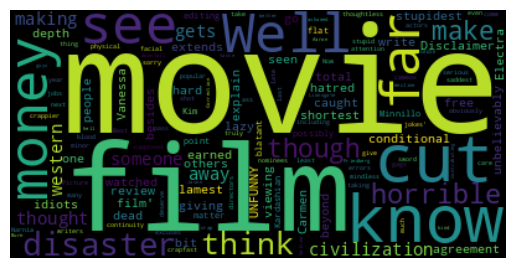

In [60]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud,STOPWORDS


wordcloud = WordCloud(stopwords = STOPWORDS).generate(df['Reviews'][0])

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [61]:
from nltk.corpus import stopwords 

stop_words = stopwords.words('english')
addn_stop_words = ["mario","la","blah","saturday","monday","sunday","morning","evening","friday","would","shall","could","might"]
stop_words.extend(addn_stop_words)
stop_words.remove('not')
stop_words = set(stop_words)
print(stop_words)

{'is', "shouldn't", 'them', 'it', 'theirs', 'o', "she's", 'with', 'more', 'now', "hasn't", "shan't", 'himself', 'has', 'once', 'yours', 'its', 'until', 'an', 'don', 'they', "mustn't", 'for', "doesn't", 'herself', 'you', 'than', "don't", 'friday', 'won', 'how', 'any', 'ain', 'doing', 'each', 'shouldn', 'having', 'this', 'out', "couldn't", 'be', 'where', 'can', 'might', "that'll", 'a', 'your', 'his', 'was', 'should', 'did', 'during', 'both', 'why', 'most', 'that', 'here', 'no', 'being', 'whom', 'of', 'through', 'because', 'will', 'isn', 'monday', 'above', 'he', 'ours', 'and', 'haven', 'him', 'some', 'their', 'up', 'while', 'had', 'evening', 'have', 'itself', "should've", 'weren', "it's", 'at', "needn't", 'but', 'which', 'few', 'm', 'myself', "didn't", "isn't", 'were', 'these', 'nor', 'against', "weren't", 'such', 'those', 'does', "won't", 'what', 'd', 'sunday', 'wasn', 'ourselves', 'yourselves', 'below', 'she', 'themselves', 'ma', 'wouldn', 'when', "you've", 'only', 'hadn', "haven't", 's

In [62]:
import re
def expand_contraction(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content
def remove_urls(content):
    return re.sub(r'http[s]?://\S+|www\.\S+',' ',content)

def remove_special_chars(content):
    return re.sub(r'\W+',' ',content)

def remove_stop_words(content):
    cleaned_content = []
    for word in content.split():
        if word.strip().lower() not in stop_words and word.strip().lower().isalpha():
            cleaned_content.append(word.strip().lower())
    return " ".join(cleaned_content)
    
def datacleaning(content):
    content = expand_contraction(content)
    content = remove_special_chars(content)
    content = remove_urls(content)
    content = remove_stop_words(content)
    
    return content

In [63]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataCleaning(BaseEstimator,TransformerMixin):
    def __init__(self):
        print('calling init')
    def fit(self,X,y=None):
        print('running fit')
        return self
    def transform(self,X,y=None):
        print('calling tranform')
        X = X.apply(datacleaning)
        return X

In [64]:
cleaning_transformer = DataCleaning()
df['Cleaned_Reviews'] = cleaning_transformer.fit_transform(df['Reviews'])
df.columns

calling init
running fit
calling tranform


Index(['Reviews', 'Label', 'Cleaned_Reviews'], dtype='object')

In [65]:
pd.options.display.max_colwidth = 1000
df.sample(5)

,Reviews,Label,Cleaned_Reviews
148139,"I love this movie! It starts when Zack (Dylan Minnette) and his Mom move from New York to Madison, Delaware not long after his Dad dies. Their house is right next door to a very odd neighbor, but Zack meets the neighbor's daughter, Hannah (Odeya Rush) and she shows him a really cool abandoned amusement park. On his very first day of school, he meets a kid named Champ (Ryan Lee). Later that night, Zack hears Hannah screaming next door and he calls Champ to help him check it out. Champ thinks he's coming over to meet girls and his reaction to finding out he's been asked to help save Hannah is very funny. They sneak in and that is when the adventure begins. This story has many cool Goosebumps characters including Slappy (aka the Living Dummy), the Invisible Boy, the Haunted Car, the Abominable Snowman, Werewolf of Fever Swamp and the Blob that eats everyone.The cinematography and special effects are amazing. I especially liked when the ink flies off the pages of the book. The monsters...",1,love movie starts zack dylan minnette mom move new york madison delaware not long dad dies house right next door odd neighbor zack meets neighbor daughter hannah odeya rush shows really cool abandoned amusement park first day school meets kid named champ ryan lee later night zack hears hannah screaming next door calls champ help check champ thinks coming meet girls reaction finding asked help save hannah funny sneak adventure begins story many cool goosebumps characters including slappy aka living dummy invisible boy haunted car abominable snowman werewolf fever swamp blob eats everyone cinematography special effects amazing especially liked ink flies pages book monsters look great lot detail look real admit big fan goosebumps books excelled making movie true books also love acting one perfect things movie react like one really similar situation movie kind scary jump scares funnier scary many jokes champ says teenagers not afraid death born gift fear four put swing thought ends lik...
14889,"This movie is stunningly bad. Not just a poor movie. This is a waste of money. A waste of time. A waste of an opportunity whose time may not again come for decades.Note that I did not say a waste of talent. Of that there was none. The acting is unbelievably wooden. Think back to the first Star Trek movie. Yes, that bad! Burt Reynolds in particular is incredibly underwhelming.The writing is unimaginably worse. Something a sophomore would write, then toss away. There is no depth to any character, situation, or scene. Whatever you see on the screen is it. There is nothing more, and not even much there. Everything seems to have been shot in one take.Things happen for no apparent reason, then are immediately forgotten. Race scenes seem to be a mad mix of green laps, crashes, yellows, with no pattern or logic.Oh, did I mention logic? Please check it at the door because this film exhibits virtually none.We almost got tossed. You see.. since the film absolutely sucked, we re...",0,movie stunningly bad not poor movie waste money waste time waste opportunity whose time may not come decades note not say waste talent none acting unbelievably wooden think back first star trek movie yes bad burt reynolds particular incredibly underwhelming writing unimaginably worse something sophomore write toss away depth character situation scene whatever see screen nothing not even much everything seems shot one take things happen apparent reason immediately forgotten race scenes seem mad mix green laps crashes yellows pattern logic oh mention logic please check door film exhibits virtually none almost got tossed see since film absolutely sucked reverted thing left bunch guys lousy movie started counting sets hooters unofficial count rule counted female not starring role photographed show chest get movie next scene thank bernie ecclestone thank not getting involved mess one friends mentioned cart management must nuts portrayed poorly waste film